## Deep Learning with PyTorch : Neural Style Transfer

## Loading VGG Pretrained Model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                                            Importing necessary python libraries                                                              #
#                                                         Load PyTorch Library for deep learning models                                                        #
#                                             Load VGG19 (Visual Geometry Group 19 Layers) Deep Neural Network Model                                           #
#                                                                                                                                                              #
################################################################################################################################################################

# visual_geom_grp = models.vgg19(pretrained = True) # This is deprecated since pytorch v0.13 and will be removed from pytorch v0.15

"""



import torch  
from torchvision.models import VGG19_Weights, vgg19
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

visual_geom_grp = vgg19(weights=VGG19_Weights.IMAGENET1K_V1) 
visual_geom_grp = visual_geom_grp.features




Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

In [3]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                              requires_grad_() is a function that takes in Boolean Argument                                                   #
#                            It is an acronym that indicates whether a particular layer's gradient calculation is required or not                              #
#                                         Iterating through the Parameters() method or Layers called upon Model Object                                         #
#                                                                                                                                                              #
################################################################################################################################################################
"""

for para in visual_geom_grp.parameters():
  para.requires_grad_(False)




In [5]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                   Check for processor (whether cpu or gpu is available) using torch.device() method                                          #
#                                     Set the device type available for processing (cuda or cpu) using to() method                                             #
#                                                                                                                                                              #
################################################################################################################################################################
"""

processor = torch.device("cuda" if torch.cuda.is_available() else "cpu")
visual_geom_grp.to(processor)
print("Processor available is : ", processor)




Processor available is :  cuda


In [6]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                   Print the Model that has only convolution layers from which we'll extract features                                         #
#                                                                                                                                                              #
################################################################################################################################################################
"""


print(visual_geom_grp)




Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## Preprocess image

In [7]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                         Function to plot Content & Style Images for comparision side-by-side                                                 #
#                                                                                                                                                              #
################################################################################################################################################################
"""
def plot_images(content_image, style_image):
  fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,10))
  ax1.imshow(content_image)
  ax2.imshow(style_image)




In [8]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                         Pre-processing Image using custom built preprocessing_image() function.                                              #
#                                                                                                                                                              #
################################################################################################################################################################

The variabes IMAGENET_MEANS and IMAGENET_STDS are concrete values of means and standard deviations for all 3 channels of RGB Images
These values were derived while training a million images on Imagenet Dataset
"""



IMAGENET_MEANS = [0.485,0.456,0.406]
IMAGENET_STDS = [0.229,0.224,0.225]

from PIL import Image
from torchvision import transforms as TS

def preprocessing_image(path, maximum = 200):
  """
  path: directory path to the image
  maximum: maximum allowed height or width of an image
  """
  # Load the image using open() method of Image class from PIL & convert to RGB
  image = Image.open(path).convert('RGB')

  # conditionally set the size to max 500 only
  size = maximum if maximum < max(image.size) else max(image.size)

  # Design a series of operation to be performed on image using compose method of transforms from torchvision
  image_transformation = TS.Compose([
                                     TS.Resize(size),                           
                                     TS.ToTensor(),
                                     TS.Normalize(mean = IMAGENET_MEANS,
                                                  std = IMAGENET_STDS)                                
  ])

  # Call the object containing sequence of operations based on user design
  image = image_transformation(image)

  # Add a dummy dimension to include Batch Size (though the batch only contains 1 Image) {(C,H,W) -> (B,C,H,W)}
  image = image.unsqueeze(0)

  return image





In [9]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                                            preprocessing_image() function check                                                              #
#                                                                                                                                                              #
################################################################################################################################################################
"""



# content_image_p = preprocessing_image('/content/drive/MyDrive/Colab Notebooks/content.jpeg')
# style_image_p = preprocessing_image('/content/drive/MyDrive/Colab Notebooks/style.jpeg')

# content_image_p = content_image_p.to(processor)
# style_image_p = style_image_p.to(processor)

# print(content_image_p.shape)
# print(style_image_p.shape)




'\n################################################################################################################################################################\n#                                                                                                                                                              #\n#                                                            preprocessing_image() function check                                                              #\n#                                                                                                                                                              #\n################################################################################################################################################################\n'

In [10]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                                               Displaying the normalized Images                                                              #
#                                                                                                                                                              #
################################################################################################################################################################
"""
# c = np.array(content_image_p[0]).transpose(1,2,0)
# s = np.array(style_image_p[0]).transpose(1,2,0)
# plot_images(c, s)




'\n################################################################################################################################################################\n#                                                                                                                                                              #\n#                                                               Displaying the normalized Images                                                              #\n#                                                                                                                                                              #\n################################################################################################################################################################\n'

## Deprocess image

In [11]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                     Reverse-processing Image using custom built preprocessing_image() function.                                              #
#                                                                                                                                                              #
################################################################################################################################################################

The variabes IMAGENET_MEANS and IMAGENET_STDS are concrete values of means and standard deviations for all 3 channels of RGB Images
These values were derived while training a million images on Imagenet Dataset
"""


def deprocessing_image(tensored_image):

  # Change the processor to cpu for handling tensors
  image = tensored_image.to('cpu').clone()

  # convert tensor to numpy array ----> remove dummy dimension (B,C,H,W) - (C,H,W) ----> Make Channel First dimension (H,W,C) - (C,H,W)
  image = image.numpy().squeeze(0).transpose(1,2,0) 

  # Scale backk the normalized values
  image = image * np.array(IMAGENET_STDS) + np.array(IMAGENET_MEANS)

  # get values back in original range (any value <0 will become 0, >1 will become 1)
  image = image.clip(0,1)

  return image




In [12]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                                             deprocessing_image() function check                                                              #
#                                                                                                                                                              #
################################################################################################################################################################
"""

# content_image_d = deprocessing_image(content_image_p)
# style_image_d = deprocessing_image(style_image_p)

# print(content_image_d.shape)
# print(style_image_d.shape)




'\n################################################################################################################################################################\n#                                                                                                                                                              #\n#                                                             deprocessing_image() function check                                                              #\n#                                                                                                                                                              #\n################################################################################################################################################################\n'

In [13]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                                               Displaying the Original Images                                                                 #
#                                                                                                                                                              #
################################################################################################################################################################
"""
# c = content_image_d
# s = style_image_d
# plot_images(c, s)




'\n################################################################################################################################################################\n#                                                                                                                                                              #\n#                                                               Displaying the Original Images                                                                 #\n#                                                                                                                                                              #\n################################################################################################################################################################\n'

## Extract Content & Style Features
## Construct Gram Matrix

In [14]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                     Function to extract features for content & style's Gram Matrix                                                           #
#                                                                                                                                                              #
################################################################################################################################################################
"""



def extract_features(image, model):
  """
  image: input image that convolves forward through the backbone model and extract the features
  model: the cnn backbone model (could be any cnn model, here vgg-19 is used)
  """
  layers = {
      '0' : 'conv1_1',
      '5' : 'conv2_1',
      '10': 'conv3_1',
      '19': 'conv4_1',
      '21': 'conv4_2', # content feature
      '28': 'conv5_1'
  }

  # replicate the input so the original information does not get affected
  x = image

  # dictionary to store feature maps of required layers
  Features = {}

  # convolve through model to extract intermediate representations
  for name,layer in model._modules.items():
    x = layer(x)
    if name in layers:
      Features[layers[name]] = x
  return Features




In [15]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                                            extract_features() function check                                                                 #
#                                                                                                                                                              #
################################################################################################################################################################
"""

# content_image_f = extract_features(content_image_p,visual_geom_grp)
# style_image_f = extract_features(style_image_p,visual_geom_grp)
# print(content_image_f)
# print(style_image_f)




'\n################################################################################################################################################################\n#                                                                                                                                                              #\n#                                                            extract_features() function check                                                                 #\n#                                                                                                                                                              #\n################################################################################################################################################################\n'

In [16]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                     Function to construct gram matrices for style images                                                                     #
#                                                                                                                                                              #
################################################################################################################################################################
"""
def gram_mat(tensored_image):
  """
  tensored_image: contains convolution feature maps
  """

  # Get the dimension sizes
  b,c,h,w = tensored_image.size()

  # flatten the feature maps of the layer into rows
  tensored_image = tensored_image.view(c,h*w)

  # Calculate the dot product of flattened feature maps and its transpose
  gram = torch.mm(tensored_image,tensored_image.t())
  return gram




In [17]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                                            gram_mat() function check                                                                 #
#                                                                                                                                                              #
################################################################################################################################################################
"""
# style_gram_mat = {layer : gram_mat(style_image_f[layer]) for layer in style_image_f}




'\n################################################################################################################################################################\n#                                                                                                                                                              #\n#                                                            gram_mat() function check                                                                 #\n#                                                                                                                                                              #\n################################################################################################################################################################\n'

## Creating Style and Content loss function

In [18]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                                               Function to calculate content loss                                                             #
#                                                                                                                                                              #
################################################################################################################################################################
"""
def content_loss(target_conv4_2,content_conv4_2):
  """
  target image can either be content image to begin with or white noise (or Gaussian Distribution)
  target_conv4_2 :  acronym for image that is the 'target' image and its lower representation at layer 'conv4_2'
  content_conv4_2 : acronym for image that is the 'content' image and its lower representation at layer 'conv4_2'
  """

  # calculating Mean Squared error
  loss = torch.mean((target_conv4_2 - content_conv4_2)**2)
  return loss




In [19]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                                               Function to calculate Style loss                                                               #
#                                                                                                                                                              #
################################################################################################################################################################
"""

#******************************FIXED VALUES************************************#
STYLE_WEIGHTS = {
    'conv1_1':1.0,
    'conv2_1':0.75,
    'conv3_1':0.2,
    'conv4_1':0.2,
    'conv5_1':0.2
}
#******************************************************************************#



def style_loss(target_features, style_grams):

  """
  style_weights: different proportions assigned to different layers of convolutions in the cnn backbone network
  target_features: different layers represntations of target image from cnns
  style_grams: pre-calculated gram matrices of the style image
  """


  loss = 0

  # iterating through for loop to calculate losses of gram matrices at all the convolution layers
  for layer in STYLE_WEIGHTS:

    # Taking features of one layer at a time from target image
    target_f = target_features[layer]

    # calculating its gram matrices
    target_gram = gram_mat(target_f)

    #  fetching the gram matrix of the style image for the same layer from cnn as for target image 
    style_gram = style_grams[layer]

    # fetching the dimensions of 
    b,c,h,w = target_f.shape

    # Calculating the MSE loss & multiplying the corresponding style layer weights(hyperparameters)
    layer_loss = STYLE_WEIGHTS[layer] * torch.mean((target_gram - style_gram)**2)

    # Adding the loss for all the layers
    loss = loss + layer_loss/(c*h*w)

  return loss



In [20]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                                              Function to calculate Cumulative loss                                                           #
#                                                                                                                                                              #
################################################################################################################################################################
"""




def summed_loss(con_loss, sty_loss):
  loss = APLHA * con_loss + BETA * sty_loss
  return loss




In [21]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                                                      Loss functions check                                                                    #
#                                                                                                                                                              #
################################################################################################################################################################
"""

# target_image = content_image_p.clone()
# target_image = target_image.requires_grad_(True)
# target_image = target_image.to(processor)

# target_f = extract_features(target_image, visual_geom_grp)
# print("content loss is :", content_loss(target_f['conv4_2'],content_image_f['conv4_2']))
# print("style loss is :", style_loss(style_weights,target_f,style_gram_mat))




'\n################################################################################################################################################################\n#                                                                                                                                                              #\n#                                                                      Loss functions check                                                                    #\n#                                                                                                                                                              #\n################################################################################################################################################################\n'

## Training & Optimization

In [22]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                                  Function to Plot the Results for Contrasting Purposes.                                                      #
#                                                                                                                                                              #
################################################################################################################################################################
"""

def plot_results(t,c,s):
  target_clone = t[-1]
  content_clone = deprocessing_image(c)
  style_clone = deprocessing_image(s)

  fig, (ax1,ax2, ax3) = plt.subplots(1,3,figsize = (10,5))
  ax1.imshow(target_clone)
  ax2.imshow(content_clone)
  ax3.imshow(style_clone)




In [23]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                                  Function to Plot the Results for Visualization Purpose                                                      #
#                                                                                                                                                              #
################################################################################################################################################################
"""
def save_results(frames, filename, fps):

  h,w = frames[0].shape[0:2]
  fourcc = cv2.VideoWriter_fourcc(*'MP4V')
  video = cv2.VideoWriter(filename, fourcc, fps, (w,h))
  for frame in frames:
    frame = (frame*255).astype(np.uint8)
    video.write(frame)
  cv2.destroyAllWindows() 
  video.release()


  

In [24]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                                              Function to Optimize the Results                                                                #
#                                                                                                                                                              #
################################################################################################################################################################
"""

from IPython.display import clear_output, HTML
from torch import optim
from tqdm import tqdm
import cv2


def Neural_Style_Transfer(Target_Image, Content_Image, Style_Image, Model, Optimizer, Intervals, Epochs):
  """
  Target_Image: Content Image on which Style is to be Imposed (Other way is initialize White Noise & insert content while imposing style)
  Content_Image: Image with the content part
  Style_Image: Image with Style Art
  Model: CNN as a backbone (VGG19 to be specific here)
  Optimizer: Method to backpropagate
  Intervals: Intervals at Which results are to be printed
  Epochs: Number of times to run the model for optimization
  """

  plt.figure(figsize=(10,8))
  results = []
  Content_Image_F = extract_features(Content_Image, Model)
  Style_Image_F = extract_features(Style_Image, Model)
  Style_Gram_M = {layer : gram_mat(Style_Image_F[layer]) for layer in Style_Image_F}

  for i in tqdm(range(Epochs)):
    target_f = extract_features(Target_Image, Model)

    c_loss = content_loss(target_f['conv4_2'], Content_Image_F['conv4_2'])
    s_loss = style_loss(target_f, Style_Gram_M)
    tot_loss = summed_loss(c_loss, s_loss)

    Optimizer.zero_grad()
    tot_loss.backward()
    Optimizer.step()

    clear_output(wait = True)
    plt.imshow(deprocessing_image(Target_Image.detach()))
    plt.show()

    if i % Intervals == 0:
      print("Total loss at epoch {} : {}".format(i,tot_loss))
      results.append(deprocessing_image(Target_Image.detach()))

  results.append(deprocessing_image(Target_Image.detach()))
  return results





In [25]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                                              Function to Train the Network.                                                                  #
#                                                                                                                                                              #
################################################################################################################################################################
"""

def Train_The_NST_Network(C_Path, S_Path, lr = 0.09, epochs = 1000, intervals = 1):

  processor = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  content_image_p = preprocessing_image(C_Path).to(processor)
  style_image_p = preprocessing_image(S_Path).to(processor)

  target_image = content_image_p.clone()
  target_image = target_image.requires_grad_(True)
  target_image = target_image.to(processor)
  optimizer = optim.Adam([target_image],lr = lr)

  Style = Neural_Style_Transfer(target_image, content_image_p, style_image_p, visual_geom_grp, optimizer, intervals, epochs)

  return Style, content_image_p, style_image_p




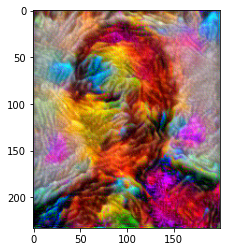

100%|██████████| 1000/1000 [03:26<00:00,  4.84it/s]


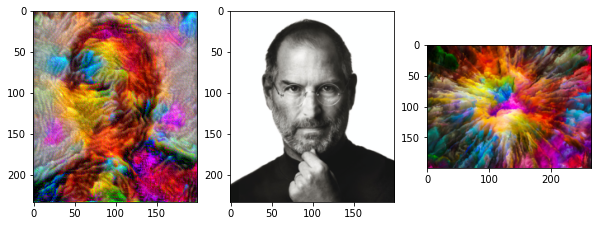

In [36]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                                                      DRIVER CODE (STYLE1)                                                                    #
#                                                                                                                                                              #
################################################################################################################################################################
"""

#******************************FIXED VALUES************************************#
APLHA = 1
BETA = 1e5
#******************************************************************************#

content_path = '/content/drive/MyDrive/Colab Notebooks/sjcontent.jpeg'
style_path = '/content/drive/MyDrive/Colab Notebooks/sjstyle.jpeg'

Transferred1, Content, Style = Train_The_NST_Network(content_path, style_path, lr=0.2)
plot_results(Transferred1, Content, Style)
save_results(Transferred1, 'take00001000.mp4', 10)


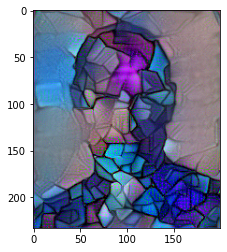

100%|██████████| 1000/1000 [03:25<00:00,  4.87it/s]


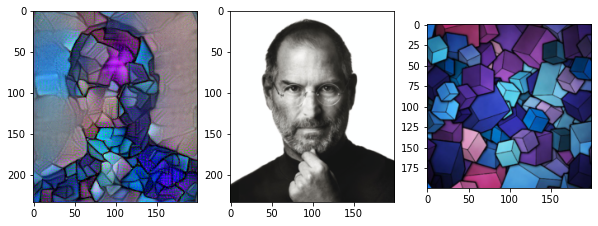

In [37]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                                                      DRIVER CODE (STYLE1)                                                                    #
#                                                                                                                                                              #
################################################################################################################################################################
"""

#******************************FIXED VALUES************************************#
APLHA = 1
BETA = 1e5
#******************************************************************************#

content_path = '/content/drive/MyDrive/Colab Notebooks/sjcontent.jpeg'
style_path = '/content/drive/MyDrive/Colab Notebooks/style2.jpeg'

Transferred2, Content, Style = Train_The_NST_Network(content_path, style_path, lr=0.3)
plot_results(Transferred2, Content, Style)
save_results(Transferred2, 'take0001000.mp4', 10)


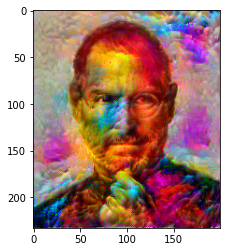

100%|██████████| 1000/1000 [03:24<00:00,  4.88it/s]


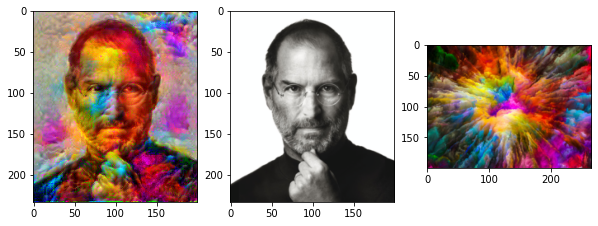

In [33]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                                                      DRIVER CODE (STYLE1)                                                                    #
#                                                                                                                                                              #
################################################################################################################################################################
"""

#******************************FIXED VALUES************************************#
APLHA = 1
BETA = 1
#******************************************************************************#

content_path = '/content/drive/MyDrive/Colab Notebooks/sjcontent.jpeg'
style_path = '/content/drive/MyDrive/Colab Notebooks/sjstyle.jpeg'

Transferred1, Content, Style = Train_The_NST_Network(content_path, style_path)
plot_results(Transferred1, Content, Style)
save_results(Transferred1, 'take001000.mp4', 10)


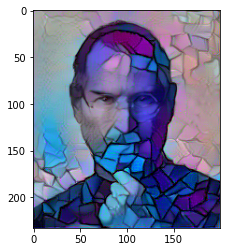

100%|██████████| 1000/1000 [03:27<00:00,  4.81it/s]


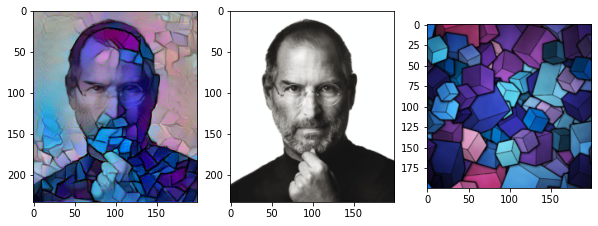

In [34]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                                                      DRIVER CODE (STYLE1)                                                                    #
#                                                                                                                                                              #
################################################################################################################################################################
"""

#******************************FIXED VALUES************************************#
APLHA = 1
BETA = 1
#******************************************************************************#

content_path = '/content/drive/MyDrive/Colab Notebooks/sjcontent.jpeg'
style_path = '/content/drive/MyDrive/Colab Notebooks/style2.jpeg'

Transferred2, Content, Style = Train_The_NST_Network(content_path, style_path)
plot_results(Transferred2, Content, Style)
save_results(Transferred2, 'take01000.mp4', 10)


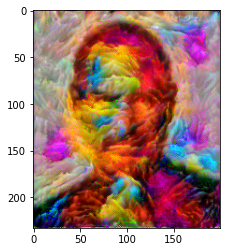

100%|██████████| 1000/1000 [03:28<00:00,  4.80it/s]


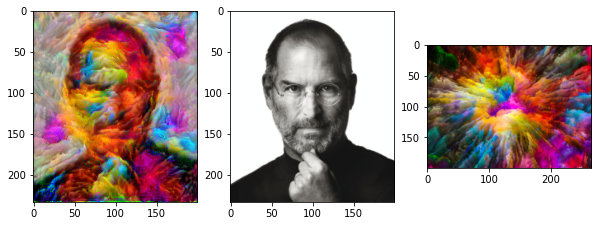

In [26]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                                                      DRIVER CODE (STYLE1)                                                                    #
#                                                                                                                                                              #
################################################################################################################################################################
"""

#******************************FIXED VALUES************************************#
APLHA = 1
BETA = 1e2
#******************************************************************************#

content_path = '/content/drive/MyDrive/Colab Notebooks/sjcontent.jpeg'
style_path = '/content/drive/MyDrive/Colab Notebooks/sjstyle.jpeg'

Transferred1, Content, Style = Train_The_NST_Network(content_path, style_path)
plot_results(Transferred1, Content, Style)
save_results(Transferred1, 'take11000.mp4', 10)


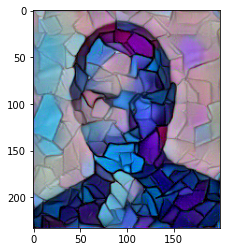

100%|██████████| 1000/1000 [03:47<00:00,  4.40it/s]


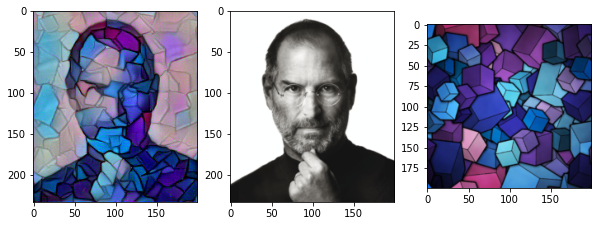

In [27]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                                                      DRIVER CODE (STYLE1)                                                                    #
#                                                                                                                                                              #
################################################################################################################################################################
"""

#******************************FIXED VALUES************************************#
APLHA = 1
BETA = 1e2
#******************************************************************************#

content_path = '/content/drive/MyDrive/Colab Notebooks/sjcontent.jpeg'
style_path = '/content/drive/MyDrive/Colab Notebooks/style2.jpeg'

Transferred2, Content, Style = Train_The_NST_Network(content_path, style_path)
plot_results(Transferred2, Content, Style)
save_results(Transferred2, 'take21000.mp4', 10)


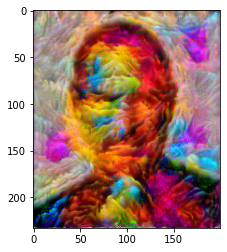

100%|██████████| 1000/1000 [03:26<00:00,  4.83it/s]


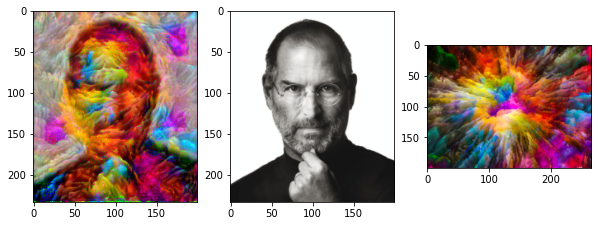

In [28]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                                                      DRIVER CODE (STYLE1)                                                                    #
#                                                                                                                                                              #
################################################################################################################################################################
"""

#******************************FIXED VALUES************************************#
APLHA = 1
BETA = 1e5
#******************************************************************************#

content_path = '/content/drive/MyDrive/Colab Notebooks/sjcontent.jpeg'
style_path = '/content/drive/MyDrive/Colab Notebooks/sjstyle.jpeg'

Transferred1, Content, Style = Train_The_NST_Network(content_path, style_path)
plot_results(Transferred1, Content, Style)
save_results(Transferred1, 'take31000.mp4', 10)


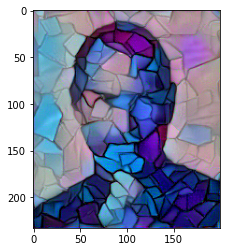

100%|██████████| 1000/1000 [03:26<00:00,  4.83it/s]


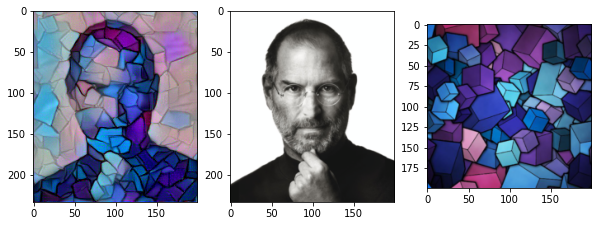

In [29]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                                                      DRIVER CODE (STYLE1)                                                                    #
#                                                                                                                                                              #
################################################################################################################################################################
"""

#******************************FIXED VALUES************************************#
APLHA = 1
BETA = 1e5
#******************************************************************************#

content_path = '/content/drive/MyDrive/Colab Notebooks/sjcontent.jpeg'
style_path = '/content/drive/MyDrive/Colab Notebooks/style2.jpeg'

Transferred2, Content, Style = Train_The_NST_Network(content_path, style_path)
plot_results(Transferred2, Content, Style)
save_results(Transferred2, 'take41000.mp4', 10)


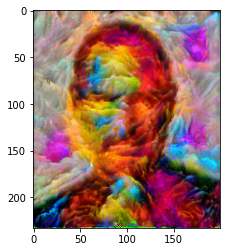

100%|██████████| 1000/1000 [03:24<00:00,  4.90it/s]


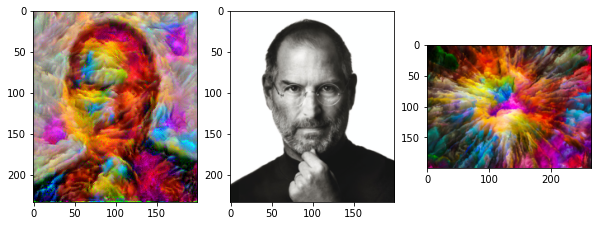

In [30]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                                                      DRIVER CODE (STYLE1)                                                                    #
#                                                                                                                                                              #
################################################################################################################################################################
"""

#******************************FIXED VALUES************************************#
APLHA = 1
BETA = 1e9
#******************************************************************************#

content_path = '/content/drive/MyDrive/Colab Notebooks/sjcontent.jpeg'
style_path = '/content/drive/MyDrive/Colab Notebooks/sjstyle.jpeg'

Transferred1, Content, Style = Train_The_NST_Network(content_path, style_path)
plot_results(Transferred1, Content, Style)
save_results(Transferred1, 'take51000.mp4', 10)


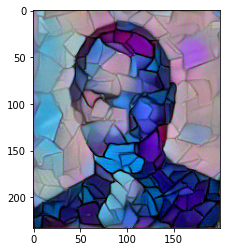

100%|██████████| 1000/1000 [03:23<00:00,  4.91it/s]


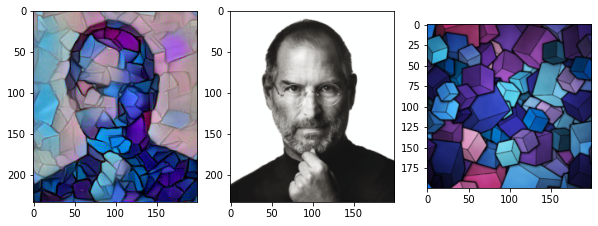

In [31]:
"""
################################################################################################################################################################
#                                                                                                                                                              #
#                                                                      DRIVER CODE (STYLE1)                                                                    #
#                                                                                                                                                              #
################################################################################################################################################################
"""

#******************************FIXED VALUES************************************#
APLHA = 1
BETA = 1e9
#******************************************************************************#

content_path = '/content/drive/MyDrive/Colab Notebooks/sjcontent.jpeg'
style_path = '/content/drive/MyDrive/Colab Notebooks/style2.jpeg'

Transferred2, Content, Style = Train_The_NST_Network(content_path, style_path)
plot_results(Transferred2, Content, Style)
save_results(Transferred2, 'take61000.mp4', 10)
